In [1]:
import torch
from transformers import AutoTokenizer
from transformers import TextGenerationPipeline, AutoModelForCausalLM, LlamaTokenizerFast, AutoModelForSequenceClassification
import os

In [2]:
model = AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", trust_remote_code=True).cuda()
tokenizer: LlamaTokenizerFast = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
# from accelerate import Accelerator
import pandas as pd
import os
import numpy as np
import gc
import copy
from tqdm import tqdm
import transformers
from typing import Dict, Optional, Sequence

IGNORE_INDEX = -100
DEFAULT_PAD_TOKEN = "[PAD]"
DEFAULT_EOS_TOKEN = "</s>"
DEFAULT_BOS_TOKEN = "<s>"
DEFAULT_UNK_TOKEN = "<unk>"

def smart_tokenizer_and_embedding_resize(
    special_tokens_dict: Dict,
    tokenizer: transformers.PreTrainedTokenizer,
    model: transformers.PreTrainedModel,
):
    """Resize tokenizer and embedding.

    Note: This is the unoptimized version that may make your embedding size not be divisible by 64.
    """
    num_new_tokens = tokenizer.add_special_tokens(special_tokens_dict)
    model.resize_token_embeddings(len(tokenizer))

    if num_new_tokens > 0:
        input_embeddings = model.get_input_embeddings().weight.data
        # output_embeddings = model.get_output_embeddings().weight.data

        input_embeddings_avg = input_embeddings[:-num_new_tokens].mean(dim=0, keepdim=True)
        # output_embeddings_avg = output_embeddings[:-num_new_tokens].mean(dim=0, keepdim=True)

        input_embeddings[-num_new_tokens:] = input_embeddings_avg
        # output_embeddings[-num_new_tokens:] = output_embeddings_avg

def get_special_tokens_dict(tokenizer):
    special_tokens_dict = dict()
    if tokenizer.pad_token is None:
        special_tokens_dict["pad_token"] = DEFAULT_PAD_TOKEN
    if tokenizer.eos_token is None:
        special_tokens_dict["eos_token"] = DEFAULT_EOS_TOKEN
    if tokenizer.bos_token is None:
        special_tokens_dict["bos_token"] = DEFAULT_BOS_TOKEN
    if tokenizer.unk_token is None:
        special_tokens_dict["unk_token"] = DEFAULT_UNK_TOKEN
    return special_tokens_dict

In [ ]:
special_tokens_dict = get_special_tokens_dict(tokenizer)
smart_tokenizer_and_embedding_resize(
    special_tokens_dict=special_tokens_dict,
    tokenizer=tokenizer,
    model=model,
)
model.config.pad_token_id = tokenizer.pad_token_id

In [6]:
# print(data.columns)
# print(len(data))
# print(data.iloc[0])
# for d in data.iloc[0]:
#     print(type(d))

In [7]:
# import pandas as pd

# # 假设data是一个pandas DataFrame，并且已经加载了相应的数据
# # 统计Label列中不同标签的数量
# label_counts = data['Label'].value_counts()
# # 获取不同标签的列表
# unique_labels = label_counts.index.tolist()
# print(unique_labels)
# print(len(unique_labels))

In [25]:
import pandas as pd
data = pd.read_csv("/opt/tiger/network_attck/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# print(data.columns)
for c in list(data.columns):
    print(str(c), type(data[c][0]))

 Destination Port <class 'numpy.int64'>
 Flow Duration <class 'numpy.int64'>
 Total Fwd Packets <class 'numpy.int64'>
 Total Backward Packets <class 'numpy.int64'>
Total Length of Fwd Packets <class 'numpy.int64'>
 Total Length of Bwd Packets <class 'numpy.int64'>
 Fwd Packet Length Max <class 'numpy.int64'>
 Fwd Packet Length Min <class 'numpy.int64'>
 Fwd Packet Length Mean <class 'numpy.float64'>
 Fwd Packet Length Std <class 'numpy.float64'>
Bwd Packet Length Max <class 'numpy.int64'>
 Bwd Packet Length Min <class 'numpy.int64'>
 Bwd Packet Length Mean <class 'numpy.float64'>
 Bwd Packet Length Std <class 'numpy.float64'>
Flow Bytes/s <class 'numpy.float64'>
 Flow Packets/s <class 'numpy.float64'>
 Flow IAT Mean <class 'numpy.float64'>
 Flow IAT Std <class 'numpy.float64'>
 Flow IAT Max <class 'numpy.int64'>
 Flow IAT Min <class 'numpy.int64'>
Fwd IAT Total <class 'numpy.int64'>
 Fwd IAT Mean <class 'numpy.float64'>
 Fwd IAT Std <class 'numpy.float64'>
 Fwd IAT Max <class 'numpy.in

In [3]:
# 将Label列转换为整数索引
data['LabelIndex'], unique_labels = pd.factorize(data[' Label'])
print(unique_labels)
label_counts = data[' Label'].value_counts()
print(label_counts)


Index(['BENIGN', 'DDoS'], dtype='object')
DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64


In [26]:
import numpy as np
tmp = data.drop(columns=[' Label'])
# 检查是否存在NaN值
print(tmp.isnull().values.any())

# 检查是否存在无穷值
print(np.isinf(tmp.values).any())

True
True


has nan False
has inf False


/home/tiger/.local/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [00:41:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.99962
[1]	train-auc:0.99985
[2]	train-auc:0.99985
[3]	train-auc:0.99986
[4]	train-auc:0.99986
[5]	train-auc:0.99986
[6]	train-auc:0.99986
[7]	train-auc:0.99986
[8]	train-auc:0.99985
[9]	train-auc:0.99986
[10]	train-auc:0.99986
[11]	train-auc:0.99986
[12]	train-auc:0.99986
[13]	train-auc:0.99986
[14]	train-auc:0.99986
[15]	train-auc:0.99986
[16]	train-auc:0.99986
[17]	train-auc:0.99986
[18]	train-auc:0.99986
[19]	train-auc:0.99986
[20]	train-auc:0.99986
[21]	train-auc:0.99986
[22]	train-auc:0.99986
[23]	train-auc:0.99986
[24]	train-auc:0.99986
[25]	train-auc:0.99986
[26]	train-auc:0.99986
[27]	train-auc:0.99986
[28]	train-auc:0.99986
[29]	train-auc:0.99986
[30]	train-auc:0.99986
[31]	train-auc:0.99986
[32]	train-auc:0.99986
[33]	train-auc:0.99986
[34]	train-auc:0.99990
[35]	train-auc:0.99990
[36]	train-auc:0.99990
[37]	train-auc:0.99990
[38]	train-auc:0.99990
[39]	train-auc:0.99990
[40]	train-auc:0.99990
[41]	train-auc:0.99990
[42]	train-auc:0.99990
[43]	train-auc:0.9999

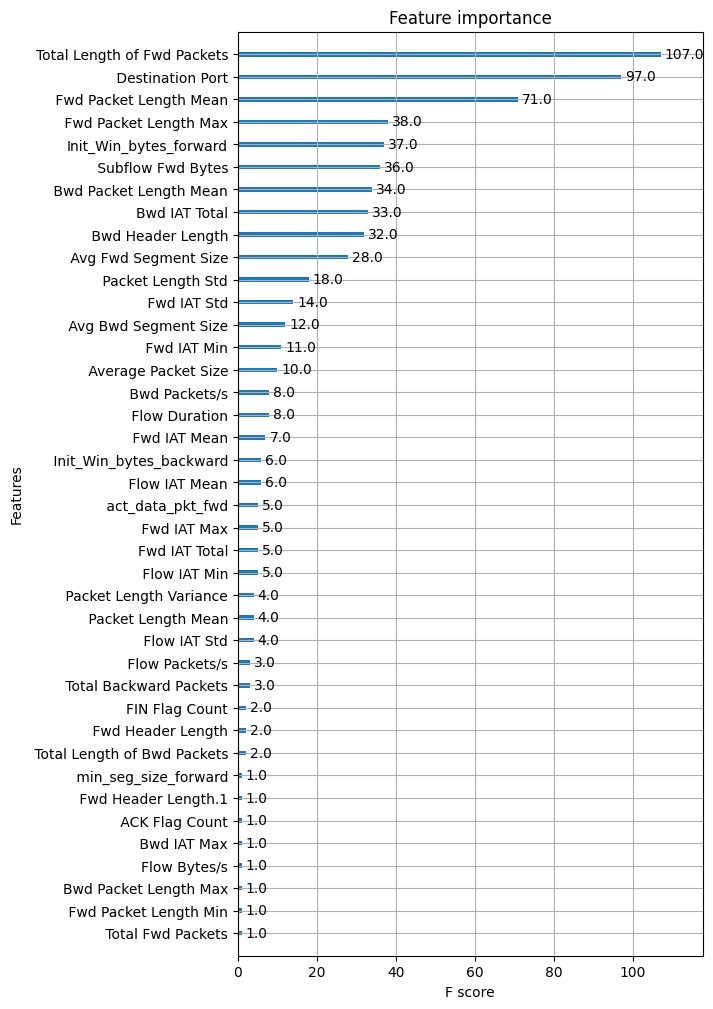

In [41]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 假设 df 是包含你数据的 pandas DataFrame，并且 'Label' 是标签列
labels = data[' Label']
features = data.drop(columns=[' Label'])
# 缺失值和inf处理
features.fillna(features.mean(), inplace=True)
# 逐列处理
features = features.replace({np.inf: 0, -np.inf: 0})
# for column in features.columns:
#     # 获取列的数据类型
#     col_dtype = features[column].dtype
    
#     # 检查是否为整数类型
#     if np.issubdtype(col_dtype, np.integer):
#         # 使用 np.iinfo 获取整数类型的信息
#         info = np.iinfo(col_dtype)
#         # 替换列中的 +inf 为最大值，-inf 为最小值加1
#         features[column] = features[column].replace({
#             np.inf: info.max,
#             -np.inf: info.min + 1
#         })
#     # 检查是否为浮点数类型
#     elif np.issubdtype(col_dtype, np.floating):
#         # 使用 np.finfo 获取浮点数类型的信息
#         info = np.finfo(col_dtype)
#         # 替换列中的 +inf 和 -inf
#         features[column] = features[column].replace({
#             np.inf: info.max - 1,
#             -np.inf: -info.max - 1
#         })
#     else:
#         # 如果既不是整数类型也不是浮点数类型，则跳过
#         continue
    
print("has nan",features.isnull().values.any())
print("has inf",np.isinf(features.values).any())

# 将标签转换为二进制编码，因为XGBoost期望数值标签
labels = labels.map({'BENIGN': 0, 'DDoS': 1})

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 调用xgb中的DMatrix()函数，把数据格式转换为xgb需要的模式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# 参数准备
params={'booster':'gbtree',  # 弱学习器的类型，默认就是gbtree，及cart决策树
        'objective': 'binary:logistic',   # 目标函数，二分类：逻辑回归，输出的是概率
        'eval_metric': 'auc',
        'max_depth':4,  # 最大深度
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':2,
        'eta': 0.025,  # 步长
        'seed':0,
        'nthread':8,
        'silent':1}

watchlist = [(dtrain,'train')]

# 开始训练模型
# params是传入模型的各个参数，以字典的形式传入
xgb_model = xgb.train(params,
                  dtrain,
                  num_boost_round= 100,  # 迭代的次数，及弱学习器的个数
                  evals= watchlist)

# 初始化XGBoost分类器
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# # 训练模型
# print(len(X_train))
# print(len(y_train))
# xgb_model.fit(X_train, y_train)
# try:
#     xgb_model.fit(X_train, y_train)
# except Exception as e:
#     print(e)
    
# 预测测试集
y_pred = xgb_model.predict(dtest)

# 评估模型
y_pred = (y_pred > 0.6).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 特征重要性
xgb.plot_importance(xgb_model)

# 获取当前图表对象
fig = plt.gcf()

# 调整图表大小
fig.set_size_inches(6,12)  # 这里的尺寸可以根据你的需求调整，例如 (12, 6)

# 显示图表
plt.show()

In [10]:
# import pandas as pd

# # 假设 data 是一个已经存在的 pandas DataFrame

# # 检查 'TextData' 列是否全为非空字符串
# all_strings = data['TextData'].apply(lambda x: isinstance(x, str) and x.strip() != '').all()

# # 检查 'LabelIndex' 列是否都为 int
# all_ints = data['LabelIndex'].apply(lambda x: isinstance(x, int) and not pd.isnull(x)).all()

# # 打印结果
# print("'TextData' 是否全为非空字符串:", all_strings)
# print("'LabelIndex' 是否都为 int:", all_ints)

In [3]:
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification, EvalPrediction
import torch
from sklearn.metrics import accuracy_score, recall_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    logits, labels = torch.tensor(logits), torch.tensor(labels)
    predictions = torch.argmax(logits, dim=-1)
    accuracy = accuracy_score(labels, predictions)
    recall = recall_score(labels, predictions, zero_division=0, average="weighted")
    return {'accuracy': accuracy, 'recall': recall}

In [4]:
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd

# 定义训练参数
training_args = TrainingArguments(
    output_dir='/opt/tiger/network/results',          # 输出目录
    num_train_epochs=1,              # 训练轮数
    per_device_train_batch_size=32,  # 训练时每个设备的batch size
    per_device_eval_batch_size=800,   # 评估时的batch size
    warmup_steps=500,                # 预热步数
    weight_decay=0.01,               # 权重衰减
    logging_dir='./logs',            # 日志目录
    logging_steps=10,
    learning_rate=1e-5,
    evaluation_strategy="no",
    save_strategy='steps',
    save_steps=500,
    save_total_limit=3
)

# 定义数据处理器
class CustomDataset:
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        inputs = self.tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
        return {
            'input_ids': inputs['input_ids'].squeeze(),  # Remove batch dimension
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
import pandas as pd
data = pd.read_csv("/opt/tiger/network_attck/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# 准备数据集
texts = data['TextData'].tolist()  # 用实际的文本列名替换'YourTextColumn'
labels = data['LabelIndex'].tolist()

# 划分训练集和验证集
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)

# 创建数据集实例
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
test_dataset = CustomDataset(test_texts, test_labels, tokenizer)

In [14]:
# import torch

# # 保存 train_dataset
# torch.save({
#     'texts': train_texts,
#     'labels': train_labels,
# }, '/opt/tiger/network_attck/train_dataset.pt')

# # 保存 test_dataset
# torch.save({
#     'texts': test_texts,
#     'labels': test_labels,
# }, '/opt/tiger/network_attck/test_dataset.pt')

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fd134c994f0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 7fd122a8fa90, raw_cell="import torch

# 保存 train_dataset
torch.save({
    .." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://arnold-proxy-i18n.tiktok-row.org/opt/tiger/network_attck/fcbank.ipynb#X20sdnNjb2RlLXJlbW90ZQ%3D%3D>,),kwargs {}:


TypeError: _resume_backend() takes 1 positional argument but 2 were given

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fd134c994f0>> (for post_run_cell), with arguments args (<ExecutionResult object at 7fd122a8fb20, execution_count=14 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 7fd122a8fa90, raw_cell="import torch

# 保存 train_dataset
torch.save({
    .." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://arnold-proxy-i18n.tiktok-row.org/opt/tiger/network_attck/fcbank.ipynb#X20sdnNjb2RlLXJlbW90ZQ%3D%3D> result=None>,),kwargs {}:


TypeError: _pause_backend() takes 1 positional argument but 2 were given

In [5]:
train, test = torch.load("train_dataset.pt"), torch.load("test_dataset.pt")
train_texts, train_labels = train["texts"], train["labels"]
test_texts, test_labels = test["texts"], test["labels"]
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
test_dataset = CustomDataset(test_texts, test_labels, tokenizer)

In [6]:
# 初始化Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,  # 传入测试数据集
    compute_metrics=compute_metrics,  # 指定计算指标的函数
)

Detected kernel version 5.4.143, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [34]:

# 开始训练
# trainer.train()

In [7]:
trainer.evaluate()

n192-025-207:289013:289013 [0] NCCL INFO cudaDriverVersion 12010
n192-025-207:289013:289013 [0] NCCL INFO NCCL_SOCKET_FAMILY set by environment to AF_INET6
n192-025-207:289013:289013 [0] NCCL INFO NCCL_SOCKET_IFNAME set by environment to eth0
n192-025-207:289013:289013 [0] NCCL INFO Bootstrap : Using eth0:fdbd:dc61:7:40::207<0>
n192-025-207:289013:289013 [0] NCCL INFO NET/Plugin : dlerror=libnccl-net.so: cannot open shared object file: No such file or directory No plugin found (libnccl-net.so), using internal implementation
NCCL version 2.19.3+cuda12.3
n192-025-207:289013:289307 [1] NCCL INFO NCCL_IB_DISABLE set by environment to 0.
n192-025-207:289013:289307 [1] NCCL INFO NCCL_SOCKET_FAMILY set by environment to AF_INET6
n192-025-207:289013:289307 [1] NCCL INFO NCCL_SOCKET_IFNAME set by environment to eth0
n192-025-207:289013:289307 [1] NCCL INFO NCCL_IB_HCA set to mlx5_2:1
n192-025-207:289013:289307 [1] NCCL INFO NET/IB : Using [0]mlx5_2:1/RoCE [RO]; OOB eth0:fdbd:dc61:7:40::207<0>
n

/home/tiger/.local/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenize

{'eval_loss': 0.026331692934036255,
 'eval_accuracy': 0.99475478625754,
 'eval_recall': 0.99475478625754,
 'eval_runtime': 382.4576,
 'eval_samples_per_second': 548.335,
 'eval_steps_per_second': 0.086}

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f31e4d34d90>> (for post_run_cell), with arguments args (<ExecutionResult object at 7f3207402d90, execution_count=7 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 7f31a8200460, raw_cell="trainer.evaluate()" store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://arnold-proxy-i18n.tiktok-row.org/opt/tiger/network_attck/fcbank.ipynb#X16sdnNjb2RlLXJlbW90ZQ%3D%3D> result={'eval_loss': 0.026331692934036255, 'eval_accuracy': 0.99475478625754, 'eval_recall': 0.99475478625754, 'eval_runtime': 382.4576, 'eval_samples_per_second': 548.335, 'eval_steps_per_second': 0.086}>,),kwargs {}:


TypeError: _pause_backend() takes 1 positional argument but 2 were given